In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo

In [11]:
basic_wds = [1e-4,1e-3,1e-2,1e-1,1.0,10.,100.]
basic_wds = [1e-6,1e-5,1e-4,1e-3]
equiv_wds = [1e-2,1e-3,1e-4,1e-5]
equiv_wds = [1e-2,1e-3,1e-4,1e-5]

results = []
results = pd.DataFrame()
for basic_idx, basic_wd in enumerate(basic_wds):
    for equiv_idx, equiv_wd in enumerate(equiv_wds):
        fname = "mixedemlplog_basic" + str(basic_wd) + "_equiv" + str(equiv_wd) + ".pkl"
        if os.path.exists("./saved-outputs/" + fname):
            df = pd.read_pickle("./saved-outputs/" + fname)

#             if basic_wd == 0.:
#                 df['basic_wd'] = 1e-7
#             else:
            df['basic_wd'] = basic_wd
#             if equiv_wd == 0.:
#                 df['equiv_wd'] = 1e-7
#             else:
            df['equiv_wd'] = equiv_wd
            
            results = pd.concat((results, df))

In [12]:
results.columns = ['trial', 'tr_loss', 'te_loss', 'basic_wd', 'equiv_wd']

In [13]:
results['log_basic'] = np.log10(results['basic_wd'])
results['log_equiv'] = np.log10(results['equiv_wd'])
# results = results.replace(to_replace=-7, value=r'-inf')

results["equiv_hue"] = ["$%s$" % x for x in results["log_equiv"]]
results["basic_hue"] = ["$%s$" % x for x in results["log_basic"]]

In [14]:
len(results['basic_hue'].unique())

7

<Figure size 900x600 with 0 Axes>

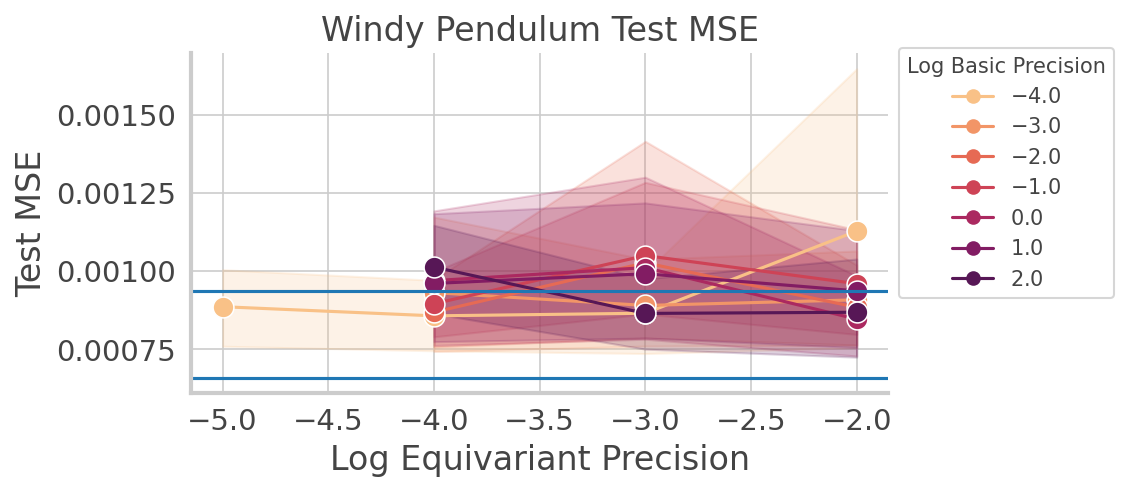

In [15]:
n_lines = len(results['basic_hue'].unique())

cpal = sns.color_palette("cmo.matter", n_colors=n_lines)#, desat=0.2)

fs = 16
sns.set_style("whitegrid")

COLOR = '#444444'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.figure(dpi=150)
# sns.lineplot(x='log_equiv', y='te_loss', hue='basic_hue', data=results[results['log_basic'] < -1.],
#             palette='RdYlBu')

fig, ax = plt.subplots(dpi=150, figsize=(6, 3))
sns.lineplot(x='log_equiv', y='te_loss', data=results,
        hue='basic_hue', markers=['o' for _ in range(n_lines)],
             style='basic_hue', dashes=False, markersize=10,
                ax=ax, palette=cpal)

ax.legend(loc='lower left', title='Log Basic Precision', bbox_to_anchor=(1., 0.25))
# ax.get_legend().remove()
ax.set_xlabel("Log Equivariant Precision", fontsize=fs)
ax.set_ylabel("Test MSE", fontsize=fs)
ax.set_title("Windy Pendulum Test MSE", fontsize=16)
# ax.set_xlim(-7, -4)
# ax.set_ylim(-0.0005, 0.0025)
ax.axhline(0.000936)
ax.axhline(0.00066)
ax.tick_params('both', labelsize=fs-2)
plt.savefig("./figs/windy_equiv_wd.pdf", bbox_inches='tight')
sns.despine()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.)
plt.show()

In [7]:
equiv_wd = 0.0001
basic_wd = 0.0001

fname = "./saved-outputs/mlplog_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

mlp = pd.read_pickle(fname)

In [8]:
mlp.mean()

0    4.500000
1    0.000615
2    0.000936
dtype: float64

In [9]:
equiv_wd = 0.0001
basic_wd = 0.0001

fname = "./saved-outputs/emlplog_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

emlp = pd.read_pickle(fname)

In [10]:
emlp.mean()

0    4.500000
1    0.000503
2    0.000571
dtype: float64